In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [5]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# EDA

### Describing data and understanding it

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2014-06-07 03:14:42.782608640,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536


In [10]:
cat_col = df.select_dtypes(include = 'object').columns
num_col = df.select_dtypes(exclude = 'object').columns
cat_col, num_col

(Index(['street', 'city', 'statezip', 'country'], dtype='object'),
 Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
        'floors', 'waterfront', 'view', 'condition', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated'],
       dtype='object'))

In [11]:
for i in cat_col:
    print(i)
    print(df[i].unique())
    print('----')

street
['18810 Densmore Ave N' '709 W Blaine St' '26206-26214 143rd Ave SE' ...
 '759 Ilwaco Pl NE' '5148 S Creston St' '18717 SE 258th St']
----
city
['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
----
statezip
['WA 98133' 'WA 98119' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115'
 'WA 98038' 'WA 98045' 'WA 98155' 'WA 98105' 'WA 98074' 'WA 98106'
 'WA 98007' 'WA 98092' 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011'
 'WA 98125' 'WA 98003' 'WA 98136' 'WA 98033' 'WA 98029' 'WA 98117'
 'WA 98034' 'WA 9807

In [12]:
#city counts
df['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [13]:
le = LabelEncoder()
df.city = le.fit_transform(df.city)
df.country = le.fit_transform(df.country)
df.city.value_counts()

city
35    1573
32     293
3      286
31     235
16     187
19     187
18     185
1      176
33     175
14     148
36     123
42     115
21      96
23      86
6       74
38      71
17      66
10      58
27      50
9       43
11      42
20      36
5       33
25      33
34      29
40      29
41      29
12      28
7       22
26      18
8       11
22      11
13      11
4        9
30       7
28       6
0        5
43       4
37       3
29       2
24       2
15       1
39       1
2        1
Name: count, dtype: int64

In [14]:
df.country.value_counts()

country
0    4600
Name: count, dtype: int64

In [15]:
df.statezip.value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [16]:
df['statezip'] = df['statezip'].str.replace('WA ', '').astype(int)
df.statezip.value_counts()

statezip
98103    148
98052    135
98117    132
98115    130
98006    110
        ... 
98047      6
98288      3
98050      2
98354      2
98068      1
Name: count, Length: 77, dtype: int64

### checking null values

In [17]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### checking correlation

In [ ]:
df = df.drop('street',axis=1)

In [17]:
df.date.dt.year.unique()

array([2014], dtype=int32)

In [18]:
df['month']=df.date.dt.month
df.date.dt.month.unique()

array([5, 6, 7], dtype=int32)

In [21]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976


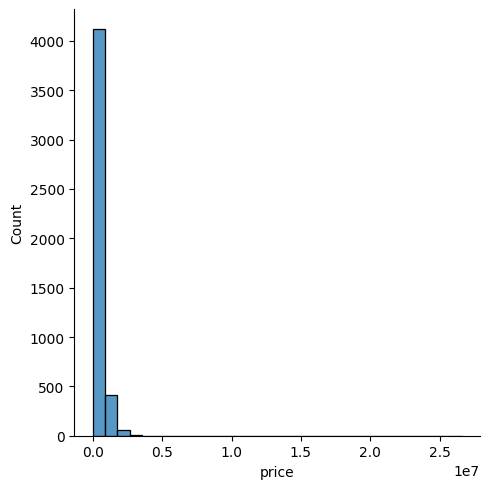

In [22]:
sns.displot(df.price, bins=30)
plt.show()

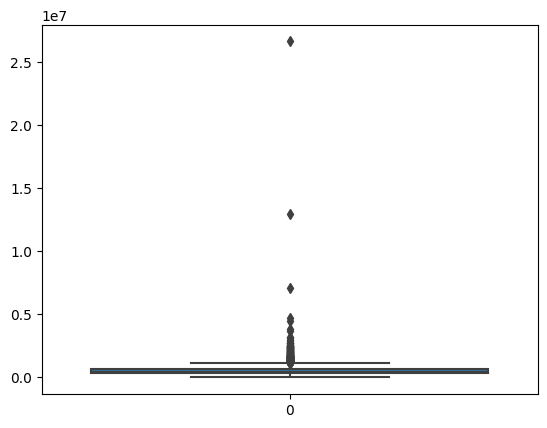

In [23]:
sns.boxplot(df.price)
plt.show()

In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

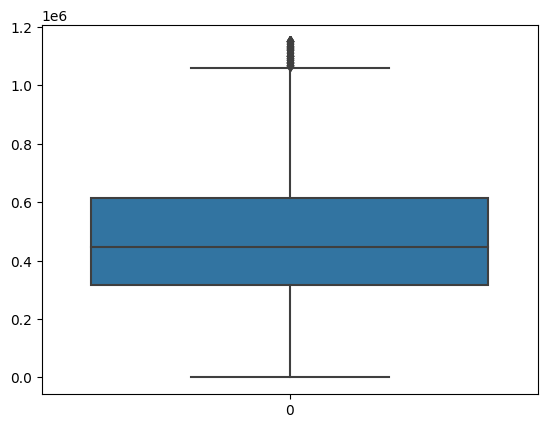

In [25]:
sns.boxplot(df.price)
plt.show()

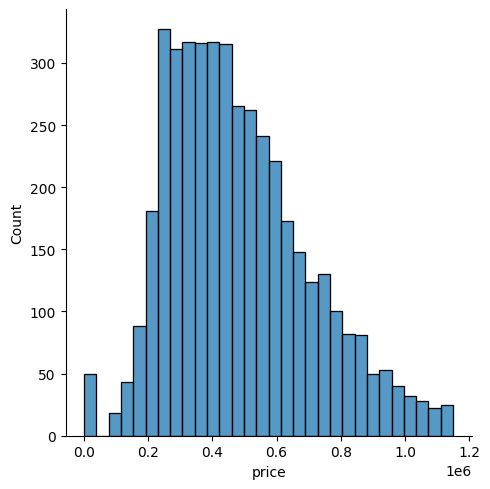

In [26]:
sns.displot(df.price, bins=30)
plt.show()

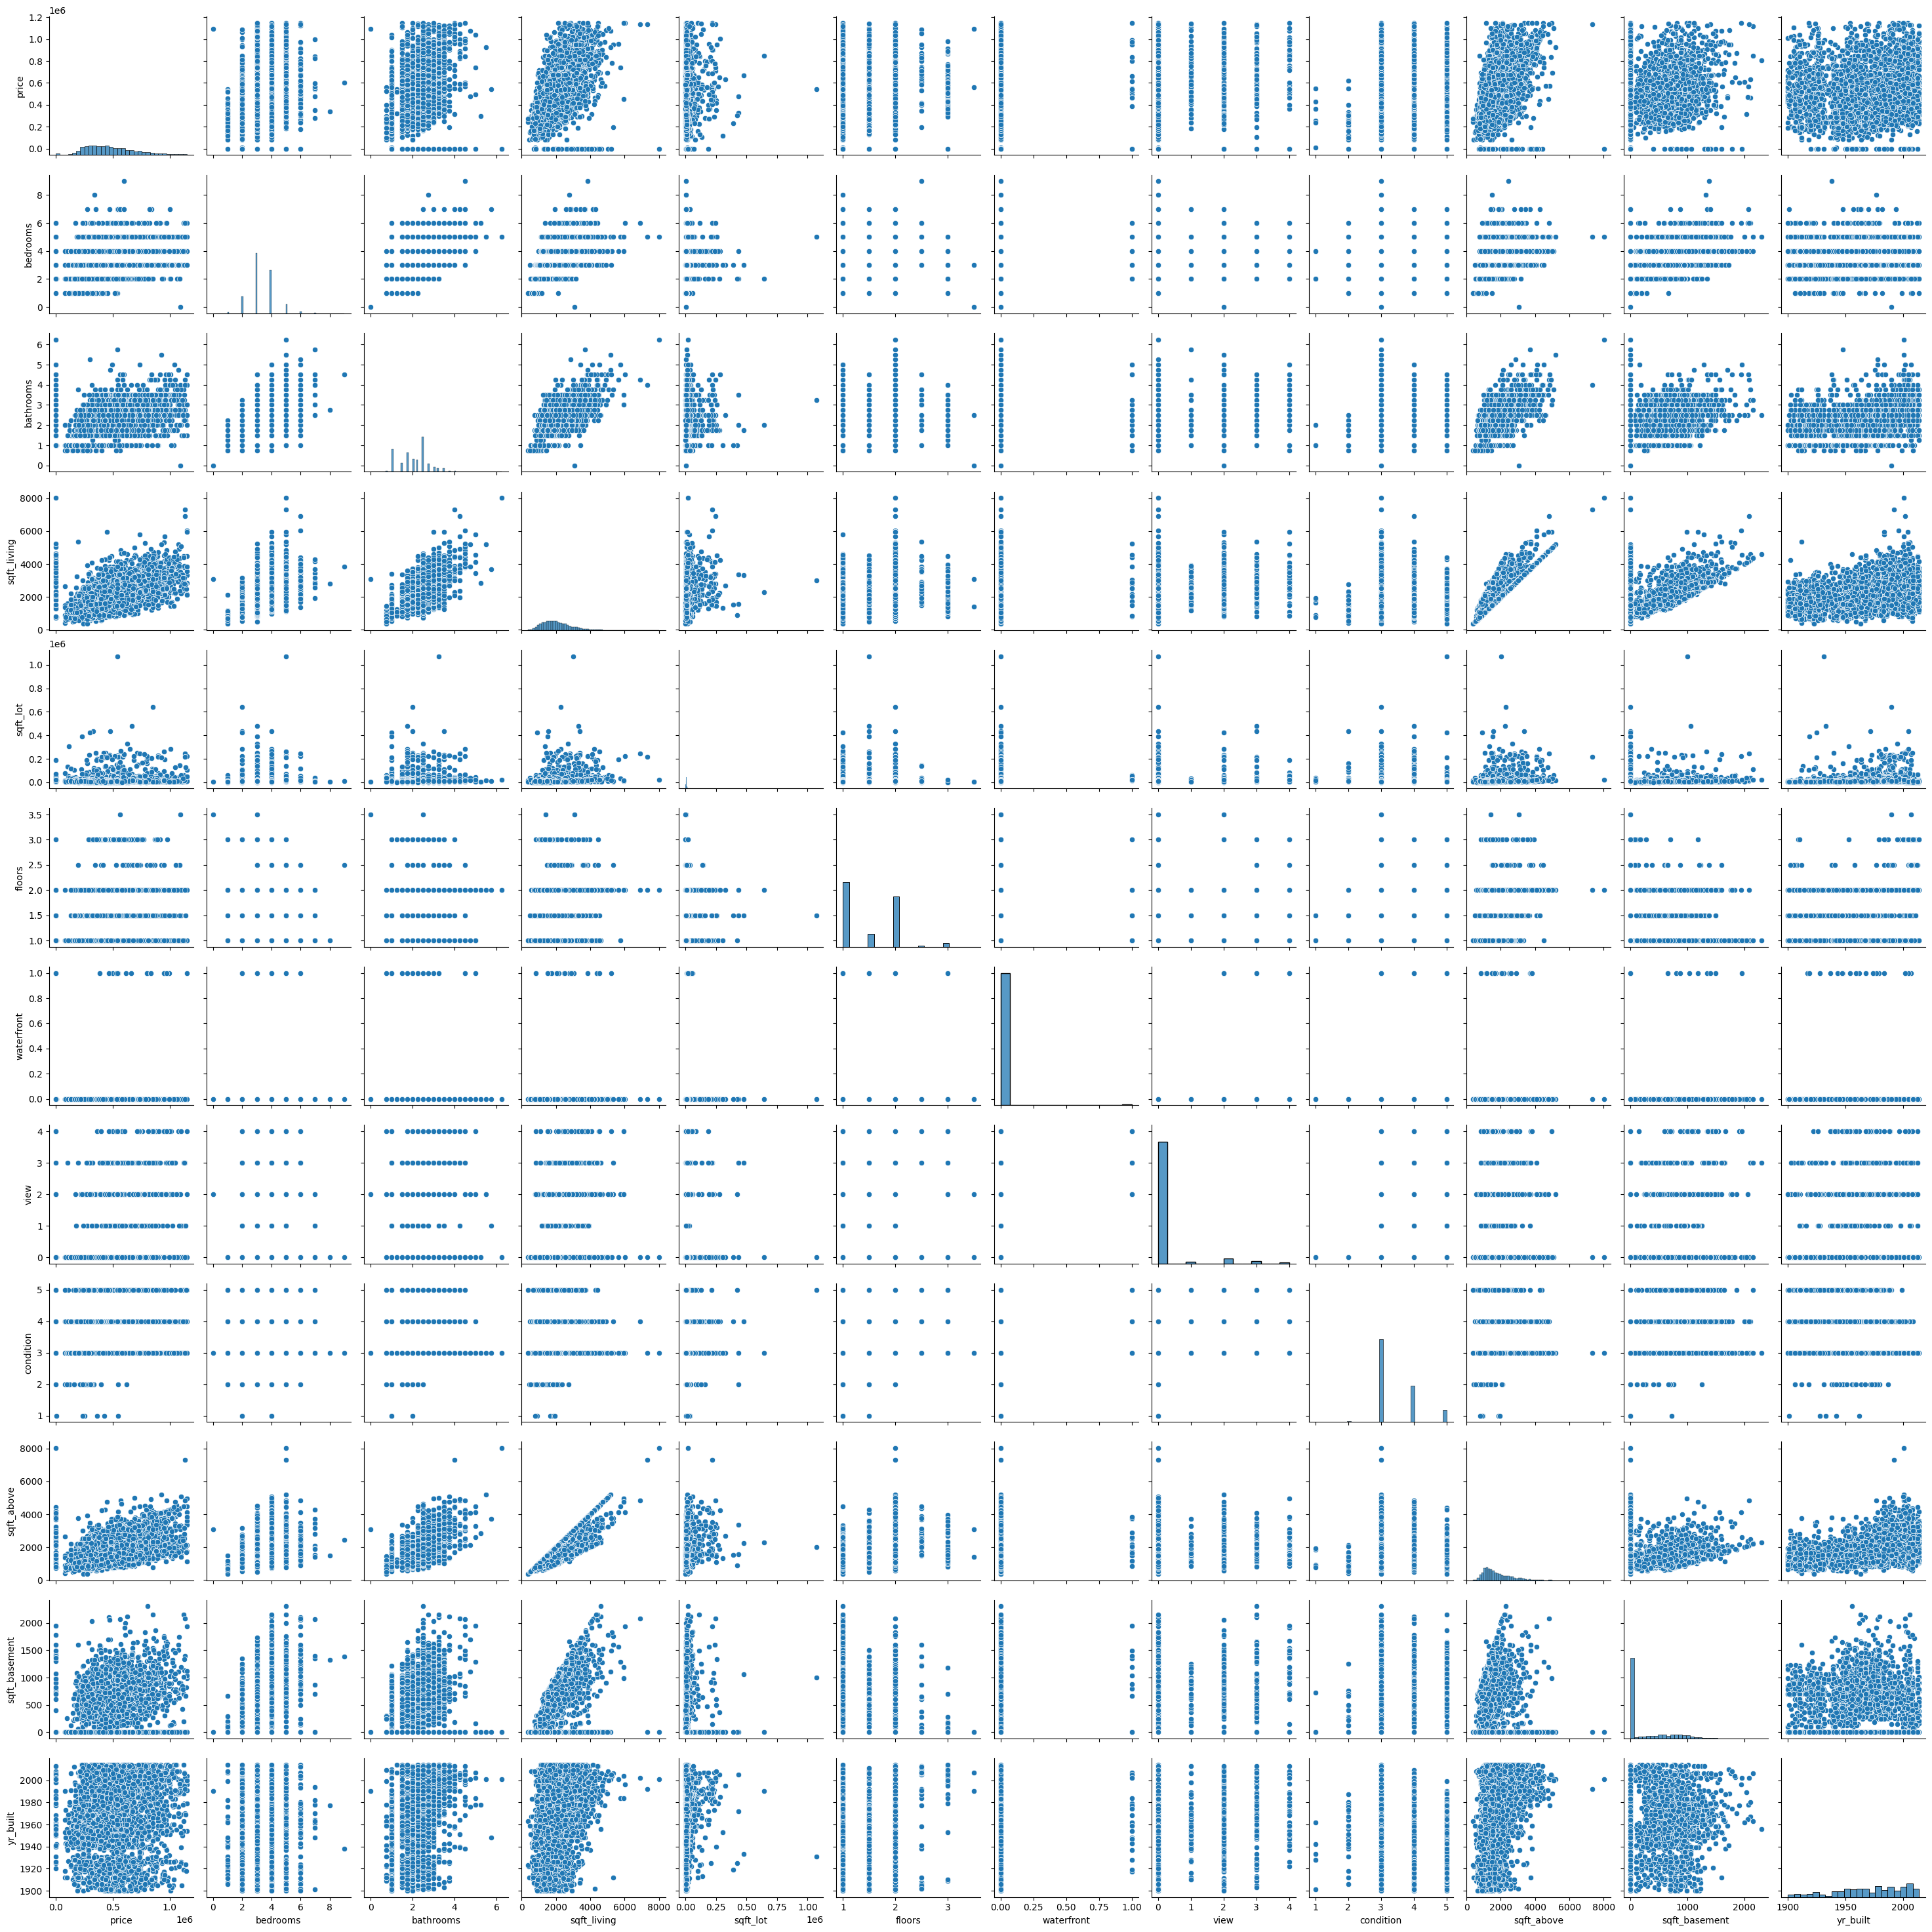

In [27]:
sns.pairplot(df)
plt.show()

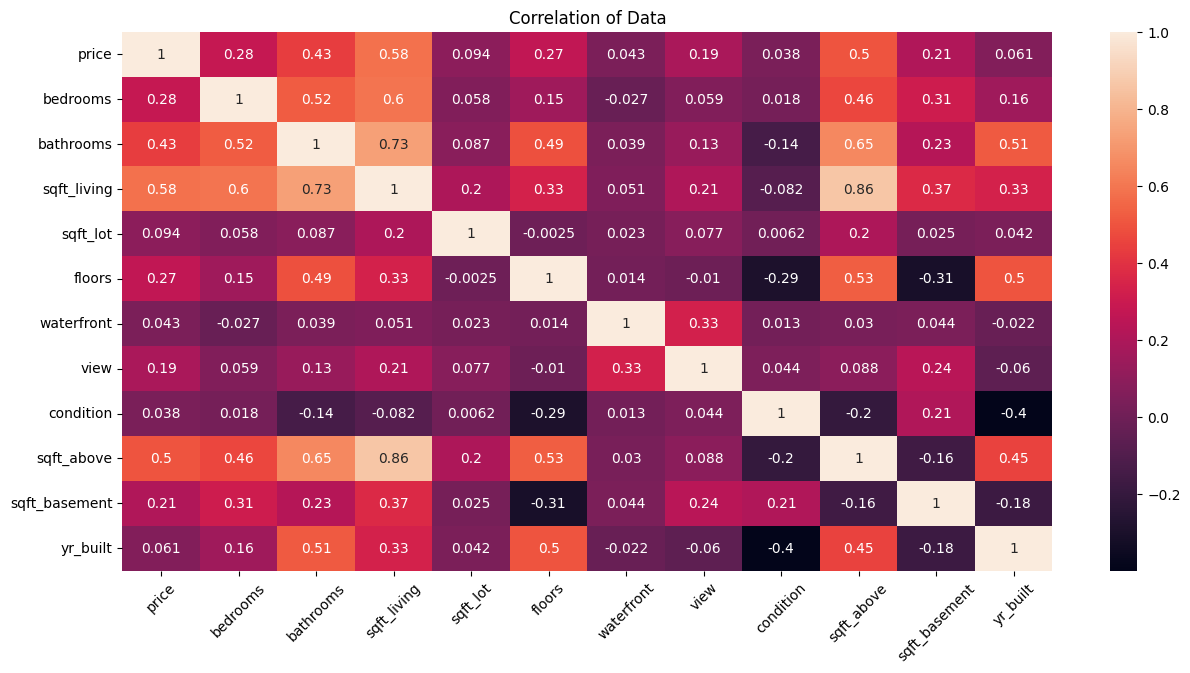

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation of Data")
plt.xticks(rotation=45)
plt.show()

In [29]:
df.price.value_counts()

price
0.0         49
300000.0    42
400000.0    31
600000.0    29
450000.0    29
            ..
298000.0     1
328500.0     1
712500.0     1
689800.0     1
220600.0     1
Name: count, Length: 1569, dtype: int64

In [30]:
df = df[df.price>0]

In [31]:
X=df.drop(columns='price')
y=df['price']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [33]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("LinearRegression")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("DecisionTreeRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("RandomForestRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("KNN")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

LinearRegression
MAE:  118178.28534442364
MSE: 23065282961.83713
R2 Score:  0.4941509317046433
---------
DecisionTreeRegressor
MAE:  157207.9788165863
MSE: 42484490002.906136
R2 Score:  0.06826464168980029
---------
RandomForestRegressor
MAE:  111103.75555822361
MSE: 20251040179.72847
R2 Score:  0.5558706206259542
---------
KNN
MAE:  126825.20223737543
MSE: 27937796380.363167
R2 Score:  0.387290921485124
---------


In [34]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
y_pred=model.predict(X_test)

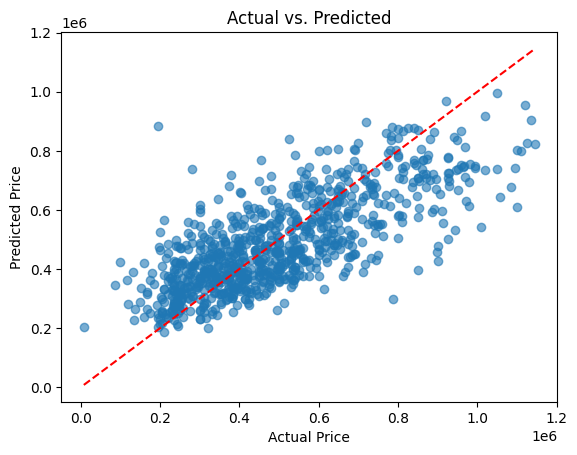

In [36]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted')
plt.show()

In [37]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = RandomForestRegressor(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test RMSE: 142640.62176420534


In [38]:
y_pred = best_dtree_reg.predict(X_test)  # or gbr.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.5538
MSE: 20346346977.2791
RMSE: 142640.6218
MAE: 111414.9869
